# Yelp - Data Preprocessing



## Dataset Introduction

[Yelp Dataset Challenge](https://www.yelp.com/dataset_challenge)

The Challenge Dataset:

    4.1M reviews and 947K tips by 1M users for 144K businesses
    1.1M business attributes, e.g., hours, parking availability, ambience.
    Aggregated check-ins over time for each of the 125K businesses
    200,000 pictures from the included businesses

Cities:

    U.K.: Edinburgh
    Germany: Karlsruhe
    Canada: Montreal and Waterloo
    U.S.: Pittsburgh, Charlotte, Urbana-Champaign, Phoenix, Las Vegas, Madison, Cleveland

Files:

    yelp_academic_dataset_business.json
    yelp_academic_dataset_checkin.json
    yelp_academic_dataset_review.json
    yelp_academic_dataset_tip.json
    yelp_academic_dataset_user.json

Notes on the Dataset

    Each file is composed of a single object type, one json-object per-line.
    Take a look at some examples to get you started: https://github.com/Yelp/dataset-examples.



## Read data from file and load to Pandas DataFrame

In [1]:
import json
import pandas as pd

In [2]:
file_business, file_checkin, file_review, file_tip, file_user = [
    'yelp_dataset_challenge_round9/yelp_academic_dataset_business.json',
    'yelp_dataset_challenge_round9/yelp_academic_dataset_checkin.json',
    'yelp_dataset_challenge_round9/yelp_academic_dataset_review.json',
    'yelp_dataset_challenge_round9/yelp_academic_dataset_tip.json',
    'yelp_dataset_challenge_round9/yelp_academic_dataset_user.json'
]

#### Business Data

In [3]:
with open(file_business) as f:
    df_business = pd.DataFrame(json.loads(line) for line in f)

In [4]:
df_business.head(2)

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,neighborhood,postal_code,review_count,stars,state,type
0,"227 E Baseline Rd, Ste J2","[BikeParking: True, BusinessAcceptsBitcoin: Fa...",0DI8Dt2PJp07XkVvIElIcQ,"[Tobacco Shops, Nightlife, Vape Shops, Shopping]",Tempe,"[Monday 11:0-21:0, Tuesday 11:0-21:0, Wednesda...",0,33.378214,-111.936102,Innovative Vapors,,85283,17,4.5,AZ,business
1,495 S Grand Central Pkwy,"[BusinessAcceptsBitcoin: False, BusinessAccept...",LTlCaCGZE14GuaUXUGbamg,"[Caterers, Grocery, Food, Event Planning & Ser...",Las Vegas,"[Monday 0:0-0:0, Tuesday 0:0-0:0, Wednesday 0:...",1,36.192284,-115.159272,Cut and Taste,,89106,9,5.0,NV,business


In [5]:
df_business.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144072 entries, 0 to 144071
Data columns (total 16 columns):
address         144072 non-null object
attributes      127162 non-null object
business_id     144072 non-null object
categories      143747 non-null object
city            144072 non-null object
hours           102464 non-null object
is_open         144072 non-null int64
latitude        144072 non-null float64
longitude       144072 non-null float64
name            144072 non-null object
neighborhood    144072 non-null object
postal_code     144072 non-null object
review_count    144072 non-null int64
stars           144072 non-null float64
state           144072 non-null object
type            144072 non-null object
dtypes: float64(3), int64(2), object(11)
memory usage: 17.6+ MB


## Filter data by city and category

In [10]:
cond_city = df_business['city'] == 'Las Vegas'
cond_category_not_null = ~ df_business['categories'].isnull()
cond_category_restaurant = df_business['categories'].apply(str).str.contains('Restaurants')

In [11]:
# Create filtered DataFrame, and name it df_filtered
df_filtered = df_business[cond_city & cond_category_not_null & cond_category_restaurant]

#### Keep relevant columns

* only keep some useful columns: business_id, name, categories, stars

In [12]:
selected_features = [u'business_id', u'name', u'categories', u'stars']

In [13]:
df_selected_business = df_filtered[selected_features]

In [14]:
# Rename the column name "stars" to "avg_stars" to avoid naming conflicts with review dataset
df_selected_business.rename(columns={'stars': 'avg_stars'}, inplace=True)

/Users/stone/anaconda/lib/python2.7/site-packages/pandas/core/frame.py:2754: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  **kwargs)


In [15]:
df_selected_business.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5431 entries, 37 to 144054
Data columns (total 4 columns):
business_id    5431 non-null object
name           5431 non-null object
categories     5431 non-null object
avg_stars      5431 non-null float64
dtypes: float64(1), object(3)
memory usage: 212.1+ KB


In [16]:
df_selected_business.head()

,business_id,name,categories,avg_stars
37,saWZO6hB4B8P-mIzS1--Xw,Kabob Palace,"[Persian/Iranian, Restaurants, Ethnic Food, Fo...",2.5
71,hMh9XOwNQcu31NAOCqhAEw,Taste of India,"[Restaurants, Vegetarian, Indian]",3.5
72,pmJqSsCfgbo3TxPWpQNLIw,Artisanal Foods Cafe,"[American (New), Cafes, Restaurants]",4.5
102,kUUBBLBHCasOl2a5nW9nAw,Bailey's Sports Bar & Eatery,"[Nightlife, Bars, Restaurants, Thai, Sports Bars]",3.5
103,A2pZTpFXWC38z506XIhnBQ,Wingstop,"[Chicken Wings, Fast Food, Restaurants]",3.5


#### Save results to csv files

In [17]:
df_selected_business.to_csv('data/selected_business.csv', index=False, encoding='utf-8')

In [18]:
# Check if everything works fine
pd.read_csv('data/selected_business.csv', encoding='utf-8')

,business_id,name,categories,avg_stars
0,saWZO6hB4B8P-mIzS1--Xw,Kabob Palace,"[Persian/Iranian, Restaurants, Ethnic Food, Fo...",2.5
1,hMh9XOwNQcu31NAOCqhAEw,Taste of India,"[Restaurants, Vegetarian, Indian]",3.5
2,pmJqSsCfgbo3TxPWpQNLIw,Artisanal Foods Cafe,"[American (New), Cafes, Restaurants]",4.5
3,kUUBBLBHCasOl2a5nW9nAw,Bailey's Sports Bar & Eatery,"[Nightlife, Bars, Restaurants, Thai, Sports Bars]",3.5
4,A2pZTpFXWC38z506XIhnBQ,Wingstop,"[Chicken Wings, Fast Food, Restaurants]",3.5
5,InDH4ZQ_byiQ5PyaqgHI8Q,Big Mama's Soul Food Rib Shack,"[Barbeque, Restaurants, Southern]",2.0
6,WleVOQ9YhBYl4SWrlsLDhA,Red Apple Grill,"[Restaurants, Burgers, Local Flavor, Barbeque]",3.5
7,gMUAn6xcuE-TbY1seFw_Ww,Presto Calzone Bakery,"[Desserts, Food, Pizza, Restaurants, Bakeries]",4.5
8,kUntNQ5P9IrRzEoHdRxV-w,Mark Rich's New York Pizza & Pasta,"[Restaurants, Pizza]",3.5
9,-vb_yx5QnIhpXUIdPVD2og,Fair View Chinese Cuisine,"[Restaurants, Chinese]",3.5


### Use the "business_id" column to filter review data

* We want to make a DataFrame that contain and only contain the reviews about the business entities we just obtained

#### Load review dataset

In [19]:
with open(file_review) as f:
    df_review = pd.DataFrame(json.loads(line) for line in f)
df_review.head(2)

,business_id,cool,date,funny,review_id,stars,text,type,useful,user_id
0,2aFiy99vNLklCx3T_tGS9A,0,2011-10-10,0,NxL8SIC5yqOdnlXCg18IBg,5,If you enjoy service by someone who is as comp...,review,0,KpkOkG6RIf4Ra25Lhhxf1A
1,2aFiy99vNLklCx3T_tGS9A,0,2010-12-29,0,pXbbIgOXvLuTi_SPs1hQEQ,5,After being on the phone with Verizon Wireless...,review,1,bQ7fQq1otn9hKX-gXRsrgA


#### Prepare dataframes to be joined, - on business_id

In [20]:
# Prepare the business dataframe and set index to column "business_id", and name it as df_left
df_left = df_selected_business.set_index('business_id')

In [21]:
# Prepare the review dataframe and set index to column "business_id", and name it as df_right
df_right = df_review.set_index('business_id')

In [22]:
# Join df_left and df_right.
df_joined = df_left.join(df_right, how='inner')

In [23]:
df_joined.reset_index(inplace=True)

#### We further filter data by date, e.g. keep comments from last 2 years

* Otherwise laptop may crush on memory when running machine learning algorithms
* Purposefully ignoring the reviews made too long time ago

In [24]:
cond_last_2_years = df_joined['date'] > u'2015-01-20'

In [25]:
df_final = df_joined[cond_last_2_years]

#### Take a look at the final dataset


In [26]:
import matplotlib.pyplot as plt

% matplotlib inline

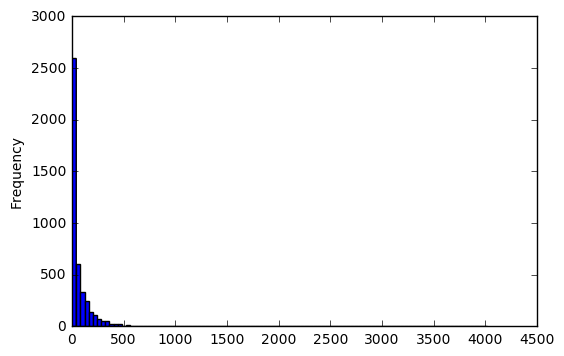

In [27]:
# Calculate counts of reviews per business entity, and plot it
df_final['business_id'].value_counts().plot.hist(bins=100)

## Save preprocessed dataset to csv file


In [28]:
# Save to ./data/last_2_years_restaurant_reviews.csv for your next task
df_final.to_csv('data/last_2_years_restaurant_reviews.csv', index=False, encoding='utf-8')